In [1]:
import sys
import datetime
from finplan import CashFlow, NetValue, get_next_month 
import plotnine

In [17]:
today = datetime.date.today()
next_month = get_next_month(today)
equity = CashFlow(name="equity", start_date=today, start_value = 10**6/2.0, monthly_growth_rate=1+.01/12.0)
cash = CashFlow(name="cash", start_date=today, start_value=10**6/2.0, monthly_growth_rate=1)
bonds = CashFlow(name="bonds", start_date=today, start_value=.8*10**6, monthly_growth_rate=1+.01/12.0)
john_income = CashFlow(name="john_income", start_date=today, end_date=datetime.date(2026,1,1),
                  monthly_value=50000, monthly_growth_rate=1+.01/12.0)
laura_income = CashFlow(name="laura_income", start_date=today, end_date=datetime.date(2030,1,1),
                  monthly_value=50000, monthly_growth_rate=1+.01/12.0)
lake_house = CashFlow(name="lake_house", start_date=today, end_date=today,
                  monthly_value=300000, monthly_growth_rate=1)
expenses = CashFlow(name="expenses", start_date=today, monthly_value=-90000, monthly_growth_rate=1+.08/12.0)
ava_college = CashFlow(name="ava_college", start_date=datetime.date(2025, 9, 1), end_date=datetime.date(2028,6,1),
                       monthly_value=-50000, monthly_growth_rate=1)
NV = NetValue("wealth", start_date=today)
NV.add_cash_flow(ava_college)
NV.add_cash_flow(lake_house)
NV.add_cash_flow(cash)
NV.add_cash_flow(equity)
NV.add_cash_flow(bonds)
NV.add_cash_flow(john_income)
NV.add_cash_flow(laura_income)
NV.add_cash_flow(expenses)
df = NV.get_value_df(end_date=datetime.date(2050, 12,1))
df.sort_values(by="date", inplace=True)
df.head(20)

,date,ava_college,lake_house,cash,equity,bonds,john_income,laura_income,expenses,total
34,2021-03-01,NaN,300000.0,500000.0,500000.000000,800000.000000,50000.000000,50000.000000,-90000.000000,2.110000e+06
35,2021-04-01,NaN,NaN,500000.0,500416.666667,800666.666667,50041.666667,50041.666667,-90600.000000,1.810567e+06
36,2021-05-01,NaN,NaN,500000.0,500833.680556,801333.888889,50083.368056,50083.368056,-91204.000000,1.811130e+06
37,2021-06-01,NaN,NaN,500000.0,501251.041956,802001.667130,50125.104196,50125.104196,-91812.026667,1.811691e+06
38,2021-07-01,NaN,NaN,500000.0,501668.751158,802670.001852,50166.875116,50166.875116,-92424.106844,1.812248e+06
39,2021-08-01,NaN,NaN,500000.0,502086.808450,803338.893520,50208.680845,50208.680845,-93040.267557,1.812803e+06
40,2021-09-01,NaN,NaN,500000.0,502505.214124,804008.342598,50250.521412,50250.521412,-93660.536007,1.813354e+06
41,2021-10-01,NaN,NaN,500000.0,502923.968469,804678.349551,50292.396847,50292.396847,-94284.939580,1.813902e+06
42,2021-11-01,NaN,NaN,500000.0,503343.071776,805348.914842,50334.307178,50334.307178,-94913.505844,1.814447e+06
43,2021-12-01,NaN,NaN,500000.0,503762.524336,806020.038938,50376.252434,50376.252434,-95546.262550,1.814989e+06


2021-03-12 23:38:04.392888


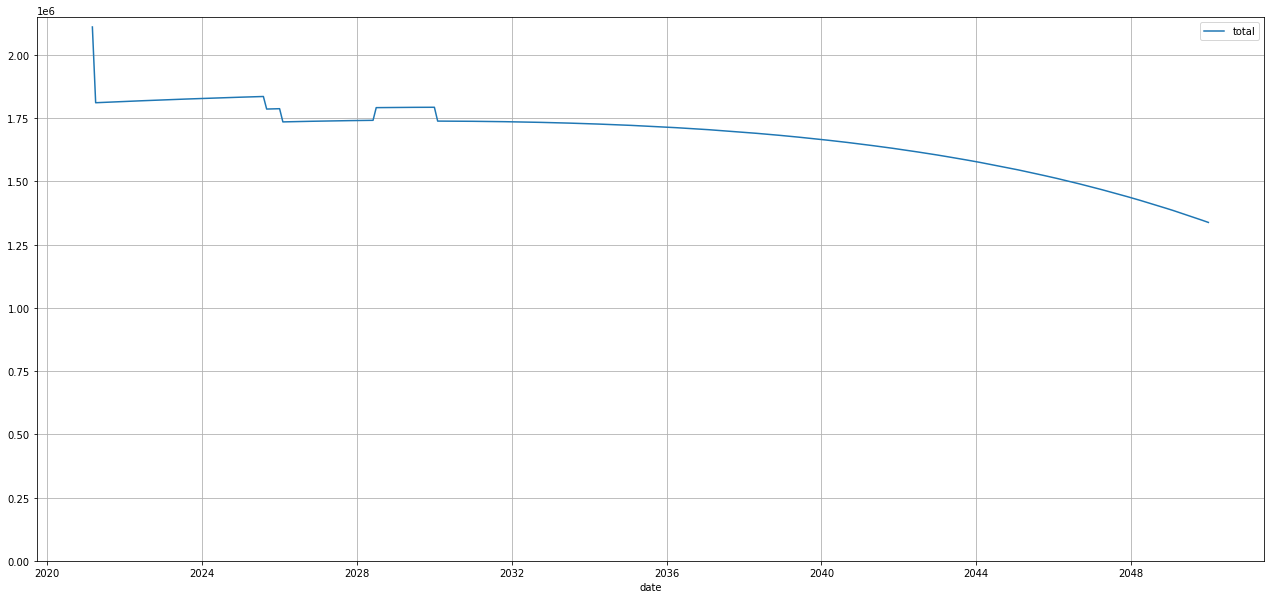

In [18]:
df.plot(x="date", y="total", figsize=[22,10], grid=True).set_ylim(bottom=0)
print(datetime.datetime.now())